Importing:

In [1]:
import json
import matplotlib.pyplot as plt
import time
import torch
import torch.nn as nn
import torch.optim as optim

from sklearn.metrics import classification_report, confusion_matrix
from tqdm import tqdm

In [2]:
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("Using GPU for training.")
else:
    device = torch.device("cpu")
    print("No GPU available, using CPU for training.")

Using GPU for training.


In [3]:
%run "../DL_notebooks/src/dataloading.ipynb"
%run "../DL_notebooks/src/training.ipynb"
%run "../DL_notebooks/src/evaluate.ipynb"
%run "../DL_notebooks/src/visualizations.ipynb"
%run "../DL_notebooks/model_architectures.ipynb"



Data loaded and split into training, validation and testing datasets


Training:

In [ ]:
def update_current_model(json_file, new_model_name):
    # Load the JSON data from the file
    with open(json_file, 'r') as file:
        data = json.load(file)

    # Update the current-model value
    data['current-model'] = new_model_name

    # Save the updated JSON data back to the file
    with open(json_file, 'w') as file:
        json.dump(data, file, indent=4)
json_file_path = '../DL_notebooks/configs/model_configs.json'
new_model_name = 'CNN'
update_current_model(json_file_path, new_model_name)

In [4]:
model_config_file = open('../DL_notebooks/configs/model_configs.json')
model_configs = json.load(model_config_file)
current_model_configs = model_configs[model_configs['current-model']]

epochs = current_model_configs['epoch-count']

match model_configs['current-model']:
    case 'CNN':
        model = MRI_CNN
match current_model_configs['loss-function']:
    case 'cross-entropy':
        criterion = nn.CrossEntropyLoss()
    case _:
        criterion = nn.CrossEntropyLoss()
match current_model_configs['optimizer']:
    case 'adam':
        optimizer = optim.Adam
    case 'adamW':
        optimizer = optim.AdamW
    case _:
        optimizer = optim.Adam

model = model(**current_model_configs['model-hyperparameters']).to(device)
optimizer = optimizer(model.parameters(), lr=current_model_configs['optimizer-lr'])

In [5]:
for epoch in tqdm(range(epochs), desc="Training", unit="epoch"):
    train_loss, train_accuracy, train_labels, train_preds = train(model, train_loader=train_loader,optimizer=optimizer, criterion=criterion, device=device)
    val_loss, val_accuracy, val_labels, val_preds = evaluate(model, val_loader, criterion=criterion, device=device)

    tqdm.write(
        f"Epoch [{epoch + 1}/{epochs}] "
        f"Train Loss: {train_loss:.4f} "
        f"Train Accuracy: {train_accuracy * 100:.2f}% "
        f"Validation Loss: {val_loss:.4f} "
        f"Validation Accuracy: {val_accuracy * 100:.2f}%"
    )

Training:  10%|█         | 1/10 [00:12<01:56, 12.90s/epoch]

Epoch [1/10] Train Loss: 1.3117 Train Accuracy: 40.23% Validation Loss: 1.3628 Validation Accuracy: 39.42%


Training:  20%|██        | 2/10 [00:21<01:24, 10.56s/epoch]

Epoch [2/10] Train Loss: 1.0033 Train Accuracy: 59.72% Validation Loss: 0.9661 Validation Accuracy: 56.38%


Training:  30%|███       | 3/10 [00:27<00:59,  8.46s/epoch]

Epoch [3/10] Train Loss: 0.7646 Train Accuracy: 67.96% Validation Loss: 0.7598 Validation Accuracy: 68.34%


Training:  40%|████      | 4/10 [00:33<00:44,  7.49s/epoch]

Epoch [4/10] Train Loss: 0.5061 Train Accuracy: 80.51% Validation Loss: 0.7581 Validation Accuracy: 68.66%


Training:  50%|█████     | 5/10 [00:39<00:34,  6.92s/epoch]

Epoch [5/10] Train Loss: 0.3156 Train Accuracy: 87.67% Validation Loss: 0.6900 Validation Accuracy: 76.41%


Training:  60%|██████    | 6/10 [00:45<00:26,  6.56s/epoch]

Epoch [6/10] Train Loss: 0.1452 Train Accuracy: 94.56% Validation Loss: 0.8288 Validation Accuracy: 77.87%


Training:  70%|███████   | 7/10 [00:52<00:20,  6.78s/epoch]

Epoch [7/10] Train Loss: 0.0864 Train Accuracy: 97.09% Validation Loss: 0.8183 Validation Accuracy: 78.35%


Training:  80%|████████  | 8/10 [01:03<00:15,  7.94s/epoch]

Epoch [8/10] Train Loss: 0.0466 Train Accuracy: 98.55% Validation Loss: 1.0505 Validation Accuracy: 76.74%


Training:  90%|█████████ | 9/10 [01:13<00:08,  8.58s/epoch]

Epoch [9/10] Train Loss: 0.0335 Train Accuracy: 98.92% Validation Loss: 1.1666 Validation Accuracy: 76.74%


Training: 100%|██████████| 10/10 [01:23<00:00,  8.33s/epoch]

Epoch [10/10] Train Loss: 0.0454 Train Accuracy: 98.55% Validation Loss: 1.1446 Validation Accuracy: 80.13%


In [6]:
test_losses = []
test_accuracies = []
for epoch in tqdm(range(epochs), desc="Testing", unit="epoch"):
    start_time = time.time()
    test_loss, test_accuracy, test_labels, test_preds = evaluate(model, test_loader, criterion=criterion, device=device)
    end_time = time.time()

    epoch_time = end_time - start_time

    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)

    tqdm.write(
        f"Testing Epoch [{epoch + 1}/{epochs}] "
        f"Test Loss: {test_loss:.4f} "
        f"Test Accuracy: {test_accuracy * 100:.2f}% "
        f"Time per Epoch: {epoch_time:.2f} seconds"
    )

avg_test_loss = sum(test_losses) / len(test_losses)
avg_test_accuracy = sum(test_accuracies) / len(test_accuracies)
print(f"Average Test Loss: {avg_test_loss:.4f}")
print(f"Average Test Accuracy: {avg_test_accuracy * 100:.2f}%")

Testing:  10%|█         | 1/10 [00:01<00:09,  1.10s/epoch]

Testing Epoch [1/10] Test Loss: 1.1759 Test Accuracy: 79.35% Time per Epoch: 1.10 seconds


Testing:  20%|██        | 2/10 [00:02<00:08,  1.07s/epoch]

Testing Epoch [2/10] Test Loss: 1.1948 Test Accuracy: 79.35% Time per Epoch: 1.05 seconds


Testing:  30%|███       | 3/10 [00:03<00:07,  1.08s/epoch]

Testing Epoch [3/10] Test Loss: 1.2325 Test Accuracy: 79.35% Time per Epoch: 1.08 seconds


Testing:  40%|████      | 4/10 [00:04<00:06,  1.08s/epoch]

Testing Epoch [4/10] Test Loss: 1.1776 Test Accuracy: 79.35% Time per Epoch: 1.09 seconds


Testing:  50%|█████     | 5/10 [00:05<00:05,  1.10s/epoch]

Testing Epoch [5/10] Test Loss: 1.1686 Test Accuracy: 79.35% Time per Epoch: 1.12 seconds


Testing:  60%|██████    | 6/10 [00:06<00:04,  1.09s/epoch]

Testing Epoch [6/10] Test Loss: 1.1759 Test Accuracy: 79.35% Time per Epoch: 1.08 seconds


Testing:  70%|███████   | 7/10 [00:07<00:03,  1.09s/epoch]

Testing Epoch [7/10] Test Loss: 1.1696 Test Accuracy: 79.35% Time per Epoch: 1.08 seconds


Testing:  80%|████████  | 8/10 [00:08<00:02,  1.08s/epoch]

Testing Epoch [8/10] Test Loss: 1.1804 Test Accuracy: 79.35% Time per Epoch: 1.04 seconds


Testing:  90%|█████████ | 9/10 [00:09<00:01,  1.09s/epoch]

Testing Epoch [9/10] Test Loss: 1.1830 Test Accuracy: 79.35% Time per Epoch: 1.10 seconds


Testing: 100%|██████████| 10/10 [00:10<00:00,  1.09s/epoch]

Testing Epoch [10/10] Test Loss: 1.2441 Test Accuracy: 79.35% Time per Epoch: 1.11 seconds
Average Test Loss: 1.1902
Average Test Accuracy: 79.35%


Classification:

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       546
           1       0.98      0.98      0.98       560
           2       0.96      0.98      0.97       254
           3       1.00      1.00      1.00       497

    accuracy                           0.99      1857
   macro avg       0.98      0.99      0.98      1857
weighted avg       0.99      0.99      0.99      1857

              precision    recall  f1-score   support

           0       0.83      0.73      0.78       169
           1       0.70      0.77      0.73       175
           2       0.82      0.78      0.80        97
           3       0.88      0.91      0.90       178

    accuracy                           0.80       619
   macro avg       0.81      0.80      0.80       619
weighted avg       0.80      0.80      0.80       619

              precision    recall  f1-score   support

           0       0.84      0.74      0.78       186
           1       0.

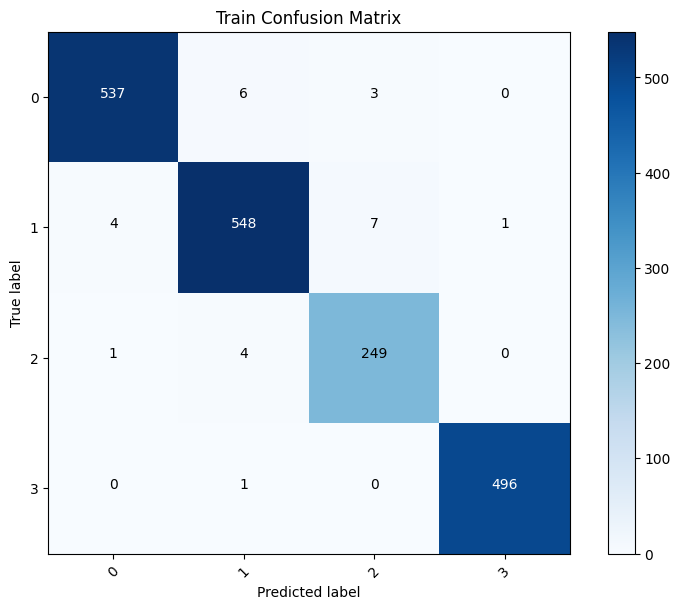

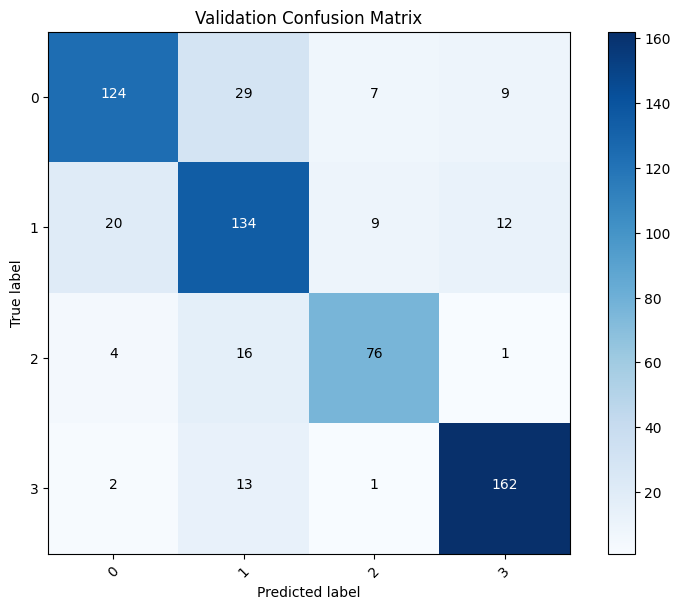

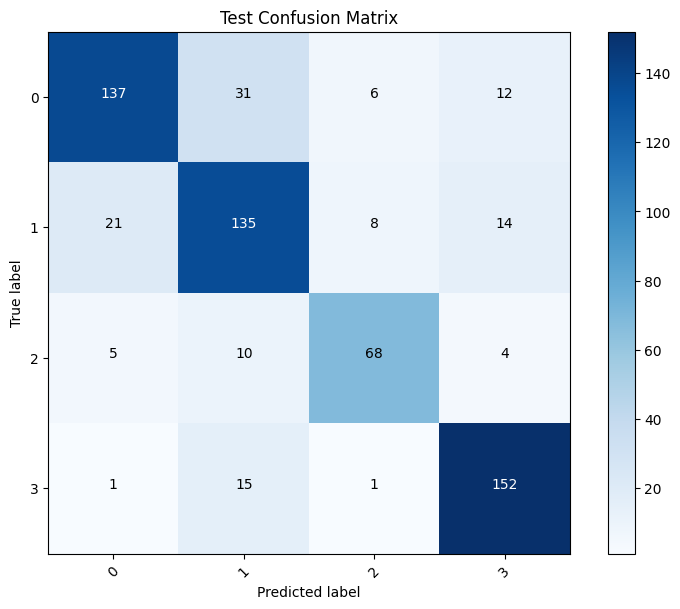

In [7]:
confusion_train = confusion_matrix(train_labels, train_preds)
confusion_val = confusion_matrix(val_labels, val_preds)
confusion_test = confusion_matrix(test_labels, test_preds)

print(classification_report(train_labels, train_preds))
print(classification_report(val_labels, val_preds))
print(classification_report(test_labels, test_preds))

class_names = [str(i) for i in range(NUM_CLASSES)]  # Update with your class names
plot_confusion_matrix(confusion_train, class_names, title='Train Confusion Matrix')
plot_confusion_matrix(confusion_val, class_names, title='Validation Confusion Matrix')
plot_confusion_matrix(confusion_test, class_names, title='Test Confusion Matrix')

plt.show()